In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'deptht'})
volumn = meshmask.e1t[0] * meshmask.e2t[0] * meshmask.e3t_0[0]
volumn = volumn.rename({'z' : 'deptht'})


In [4]:
jan = '/data/sallen/results/MEOPAR/wastewater/long_run/31jan18/SalishSea_1d_20180131_20180131_grid_T.nc'
feb = '/data/sallen/results/MEOPAR/wastewater/long_run/28feb18/SalishSea_1d_20180228_20180228_grid_T.nc'
mar = '/data/sallen/results/MEOPAR/wastewater/long_run/31mar18/SalishSea_1d_20180331_20180331_grid_T.nc'
apr = '/data/sallen/results/MEOPAR/wastewater/long_run/30apr18/SalishSea_1d_20180430_20180430_grid_T.nc'
may = '/data/sallen/results/MEOPAR/wastewater/long_run/31may18/SalishSea_1d_20180531_20180531_grid_T.nc'
jun = '/data/sallen/results/MEOPAR/wastewater/long_run/30jun18/SalishSea_1d_20180630_20180630_grid_T.nc'
jul = '/data/sallen/results/MEOPAR/wastewater/long_run/31jul18/SalishSea_1d_20180731_20180731_grid_T.nc'
aug = '/data/sallen/results/MEOPAR/wastewater/long_run/31aug18/SalishSea_1d_20180831_20180831_grid_T.nc'

In [5]:
jan_file_list = glob.glob(jan)
feb_file_list = glob.glob(feb)
mar_file_list = glob.glob(mar)
apr_file_list = glob.glob(apr)
may_file_list = glob.glob(may)
jun_file_list = glob.glob(jun)
jul_file_list = glob.glob(jul)
aug_file_list = glob.glob(aug)

# Concatenate the two lists of file paths
all_file_list = jan_file_list + feb_file_list + mar_file_list + apr_file_list + may_file_list + jun_file_list + jul_file_list + aug_file_list


# Use xr.open_mfdataset to open and combine the datasets
combined_data = xr.open_mfdataset(all_file_list, data_vars=['outfall'])
combined_data

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 8)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2018-01-31T12:00:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 dask.array<chunksize=(898, 398, 4), meta=np.ndarray>
    bounds_nav_lat        (y, x, nvertex) float32 dask.array<chunksize=(898, 398, 4), meta=np.ndarray>
    area                  (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    deptht_bounds         (deptht, axis_nbounds) float32 dask.array<chunksize=(40, 2), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    sossheig              (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    votemper              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    vosaline              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    sigma_theta           (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    e3t                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    outfall               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20180101_20180131_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2023-Oct-15 13:04:07 GMT
    uuid:         ca9ab037-b40e-4c69-9e0a-fdac654c329e

In [7]:
iz = 30
x_slice=slice(250+iz, 350-iz)
y_slice=slice(400+iz, 500-iz)
outfall_sum = (combined_data['outfall'] * volumn).where(tmask).sum(axis = 1).sum(axis = 1).sum(axis = 1)
outfall_sum

<xarray.DataArray (time_counter: 8)>
dask.array<sum-aggregate, shape=(8,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2018-01-31T12:00:00 ... 2018...

Text(0, 0.5, 'Sum of Total Outfall')

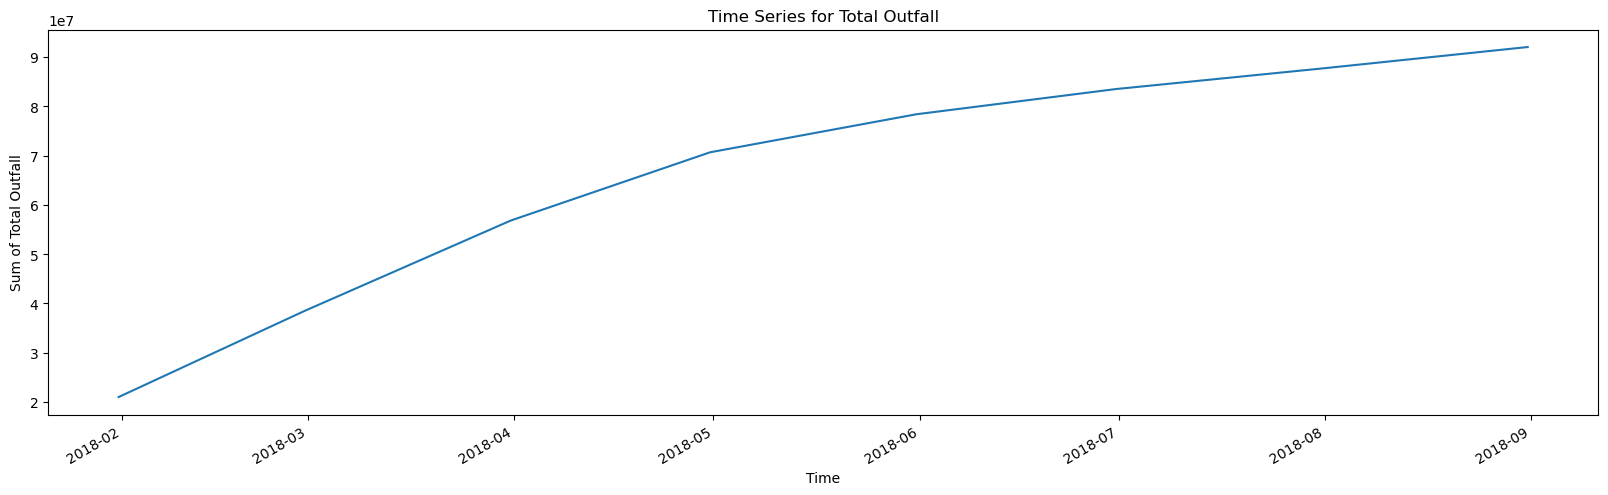

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(20, 5))
outfall_sum.plot(ax=axs)
axs.set_title(f'Time Series for Total Outfall')
axs.set_xlabel('Time')
axs.set_ylabel('Sum of Total Outfall')

In [9]:
outfall_sum_surface = (combined_data['outfall'].isel(deptht = 0) * volumn.isel(deptht = 0)).where(tmask.isel(deptht = 0)).sum(axis = 1).sum(axis = 1)
outfall_sum_surface

<xarray.DataArray (time_counter: 8)>
dask.array<sum-aggregate, shape=(8,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    deptht         float32 0.5
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2018-01-31T12:00:00 ... 2018...

Text(0, 0.5, 'Sum of Total Outfall')

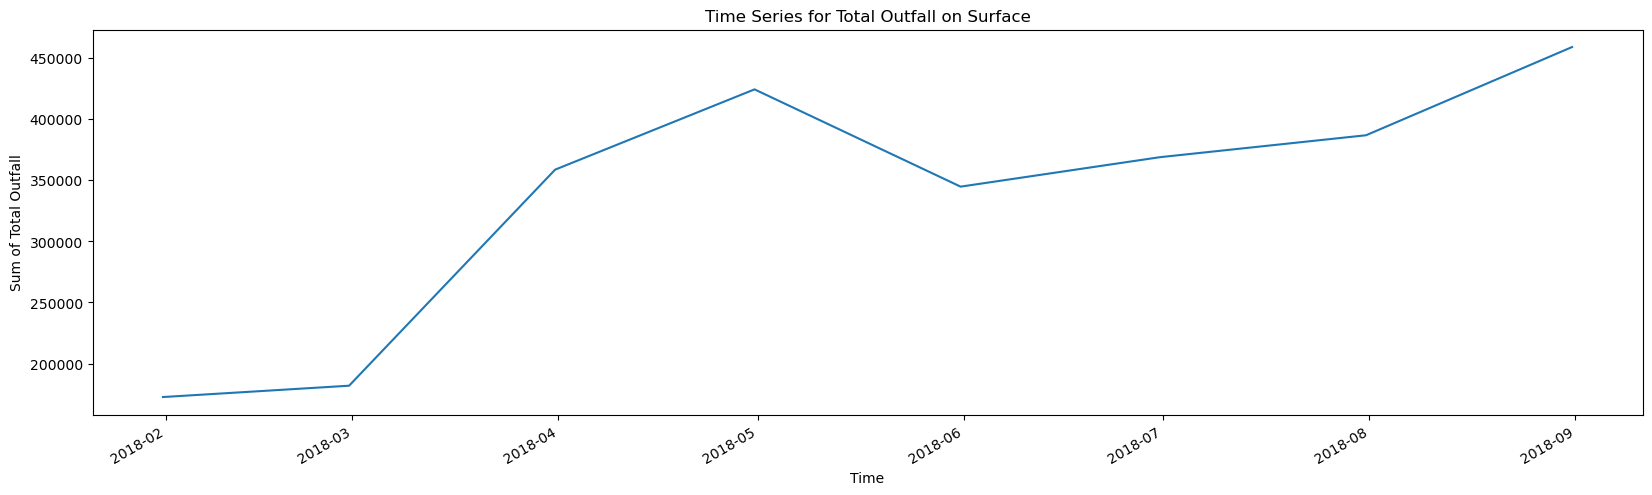

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(20, 5))
outfall_sum_surface.plot(ax=axs)
axs.set_title(f'Time Series for Total Outfall on Surface')
axs.set_xlabel('Time')
axs.set_ylabel('Sum of Total Outfall')